# Homework 6 - ME 364 (Spring 2022) Julia Buckley

For this homework, we use the dataset BIKED, which you were introduced to it before. The only difference in this dataset is that the column Bicycle Model's name has changed into Bike Class. This dataset includes 4,512 manually-designed bicycle models. The goal of the dataset developers is to enable a variety of data-driven design applications for bicycles and support the development of data-driven design methods. The dataset is comprised of a variety of design information including assembly images, component images, numerical design parameters, and class labels. The text explaining the dataset and the figure are coming from paper: https://decode.mit.edu/assets/papers/BIKED.pdf. The dataset include 19 different styles of bicycles. Figure 1 shows a list of styles and the number of samples (and the percentages) for each style in the original dataset. Mountain bikes are abbreviated as "MTB". Bikes classified as "OTHER" are labelled as such by the designer. The "Remaining Label Categories" group contains the remaining 10 explicit categories in descending order of prevalence: BMX, CITY, COMMUTER, CRUISER, HYBRID, TRIALS, CARGO, GRAVEL, CHILDRENS, FAT.

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/Biked_Dataset_Reduced.csv')   
df.head()

In [13]:
unique = df['Bicycle_Class'].unique()
print(unique)

['ROAD' 'DIRT_JUMP' 'POLO' 'BMX' 'MTB' 'TOURING' 'TRACK' 'CRUISER'
 'COMMUTER' 'CITY' 'CYCLOCROSS' 'OTHER' 'TRIALS' 'CHILDRENS' 'TIMETRIAL'
 'CARGO' 'HYBRID' 'GRAVEL' 'FAT']


<font color='red'>__Question (1)__</font>: Create a new dataset that only includes bike classes ROAD, MTB, TRACK, OTHER, DIRT JUMP, TOURING, CYCLOCROSS, and POLO. Your new dataset should still include all the features in the original dataset. You will work with this new dataset.

In [14]:
dfnew = pd.get_dummies(data=df,columns=['Bicycle_Class'])

del dfnew['Bicycle_Class_GRAVEL']
del dfnew['Bicycle_Class_BMX']
del dfnew['Bicycle_Class_CRUISER']
del dfnew['Bicycle_Class_COMMUTER']
del dfnew['Bicycle_Class_CITY']
del dfnew['Bicycle_Class_TRIALS']
del dfnew['Bicycle_Class_CHILDRENS']
del dfnew['Bicycle_Class_TIMETRIAL']
del dfnew['Bicycle_Class_CARGO']
del dfnew['Bicycle_Class_HYBRID']
del dfnew['Bicycle_Class_FAT']

dfnew.head()

,SSSIDECX3,SSSIDECX2,SSSIDECX1,SSSIDECY2,SSSIDECY1,STEMBENDS,FRONTROTORBOLTS,Shoe up angle,Down tube front diameter,LRTHICK,...,bottle DOWNTUBE0 show OHCLASS: False,bottle DOWNTUBE0 show OHCLASS: True,Bicycle_Class_CYCLOCROSS,Bicycle_Class_DIRT_JUMP,Bicycle_Class_MTB,Bicycle_Class_OTHER,Bicycle_Class_POLO,Bicycle_Class_ROAD,Bicycle_Class_TOURING,Bicycle_Class_TRACK
0,0.115968,0.213580,0.240722,0.173913,0.295455,0,0.75,0.906475,0.323077,0,...,1,0,0,0,0,0,0,1,0,0
1,0.115968,0.171084,0.199779,0.173913,0.295455,0,0.75,0.906475,0.293077,0,...,1,0,0,1,0,0,0,0,0,0
2,0.115968,0.267053,0.292434,0.173913,0.295455,0,0.75,0.899281,0.246154,0,...,1,0,0,0,0,0,1,0,0,0
3,0.115968,0.215305,0.242409,0.173913,0.295455,0,0.75,0.899281,0.246154,0,...,1,0,0,0,0,0,0,1,0,0
4,0.115968,0.233025,0.259668,0.173913,0.295455,0,0.75,0.906475,0.293077,0,...,1,0,0,1,0,0,0,0,0,0


<font color='red'>__Question (2)__</font>: This dataset include so many features. Your goal first is to find the most important features to classify the bikes. To do that, you run a logistic regression model for classification and retrieve the coeff property that contains the coefficients found for each input variable. Assuming that you have your data in dataframe called df, you can run the following code snippet to find the top 50 important features. Provide a list of these top 50 features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
model = LogisticRegression ( multiclass='multinomial' )
X = np.array(df.iloc[:,:-1])
MinMaxscaler = MinMaxScaler( ) # define min-max scaler
X_in = MinMaxscaler.fittransform(X) # transform data
y = np.array(df['Bicycle_Class'] )
# fit the model
model.fit(X_in , y)
# get importance
importance = model.coef[0]
# Top 50 important features
import numpy as np
importanceABS = np.abs( importance )
importanceABS.argsort()[-50:] [: :-1]
# returns the top 50 important features
df.columns[importanceABS.argsort( )[-50: ][::-1]]
```

In [20]:
model = LogisticRegression (multi_class='multinomial', max_iter = 500)
X = np.array(df.iloc[:,:-1])
MinMaxscaler = MinMaxScaler( ) # define min-max scaler
X_in = MinMaxscaler.fit_transform(X) # transform data
y = np.array(df['Bicycle_Class'] )
# fit the model
model.fit(X_in , y)
# get importance
importance = model.coef_[0]
# Top 50 important features
import numpy as np
importanceABS = np.abs( importance )
importanceABS.argsort()[-50:] [: :-1]
# returns the top 50 important features
df.columns[importanceABS.argsort( )[-50: ][:-1]]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Index(['Seat tube type OHCLASS: 2', 'Dim A TextField', 'BEND_POSITION',
       'Fork type OHCLASS: 0', 'TOPTUBECXr3',
       'Fork choice OHCLASS: Generic Cyclocross',
       'HBAR type OHCLASS: Generic track',
       'Brake lever brand OHCLASS: SHIMANO_2012', 'Dimension units OHCLASS: 1',
       'SPROCKETS type OHCLASS: 10-speed 12-32', 'Number of cogs',
       'SAME_SIZED_FRONT_AND_REAR', 'Display FENDERS', 'Wheel diameter front',
       'DERAILLEUR_HANGER', 'MATERIAL OHCLASS: TITANIUM', 'Teeth on cog 0',
       'FORK0T', 'FEND_aux', 'Dropout G', 'Dimension units OHCLASS: 0',
       'FORK0L', 'nSSSIDECY3', 'Wheel choice front OHCLASS: 700 X 20c',
       'Wheel choice rear OHCLASS: 700 X 20c', 'Wheel diameter rear',
       'Fork choice OHCLASS: Suspension Fork 80mm Travel', 'SIZE OHCLASS: 20',
       'HEADSETprofile OHCLASS: 0', 'Down tube type OHCLASS: 1',
       'SPOKES composite front', 'Handlebar style OHCLASS: 1',
       'SADDLETIPtoMIDDLE', 'SUSPENSION', 'SPOKES composite rear',

In [22]:
features = df[df.columns[importanceABS.argsort( )[-50: ][:-1]]]

<font color='red'>__Question (3)__</font>: Use the top 50 features to develop a Logistic Regression classifier that can predict the bike class based on these features. At this point, your dataset should include the bike classes from question 1 and features from question 2. Provide step-by-step procedure for your model development. Calculate and report the Jaccard Index and F-Score to assess the performance of the model. Provide the confusion matrix and its plot for both training and test data.

Target variable distribution:
ROAD          1856
MTB            616
TRACK          470
OTHER          315
DIRT_JUMP      293
TOURING        201
CYCLOCROSS     151
POLO           128
TIMETRIAL       89
BMX             86
COMMUTER        75
CITY            72
CRUISER         42
HYBRID          39
TRIALS          35
GRAVEL          19
CARGO           14
CHILDRENS       10
FAT              1
Name: Bicycle_Class, dtype: int64


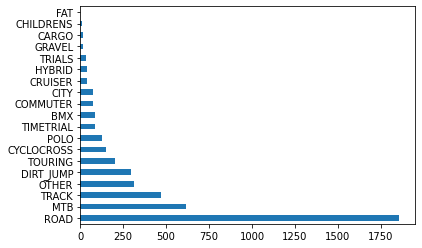

In [24]:
print('Target variable distribution:')
print(df['Bicycle_Class'].value_counts() )

df['Bicycle_Class'].value_counts().plot(kind='barh')

In [25]:
x_data = features
y_data = df['Bicycle_Class']
MinMaxscaler = MinMaxScaler() 
x_data_scaled = MinMaxscaler.fit_transform(x_data) 
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.25)
lr = LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)
yhatTest=lr.predict(x_test)
yhatTrain=lr.predict(x_train)
yhatTest[:2]
print('Order of the classes',lr.classes_)
yhatTest_prob = lr.predict_proba(x_test)
yhatTest_prob[:2]

Order of the classes ['BMX' 'CARGO' 'CHILDRENS' 'CITY' 'COMMUTER' 'CRUISER' 'CYCLOCROSS'
 'DIRT_JUMP' 'FAT' 'GRAVEL' 'HYBRID' 'MTB' 'OTHER' 'POLO' 'ROAD'
 'TIMETRIAL' 'TOURING' 'TRACK' 'TRIALS']


array([[2.81331177e-03, 2.77358223e-04, 1.49752994e-04, 1.22680051e-02,
        2.48063211e-03, 8.85558876e-03, 2.29146932e-04, 7.18849531e-01,
        6.47891881e-05, 5.02119756e-05, 9.68797161e-04, 2.00841015e-01,
        1.33339774e-02, 1.00750602e-03, 1.87265840e-02, 1.13565523e-03,
        5.43966557e-04, 1.52361582e-02, 2.16801296e-03],
       [1.96292299e-03, 8.31109373e-06, 1.26210889e-04, 1.32706096e-03,
        3.62138835e-04, 3.84928930e-05, 1.26313164e-03, 5.51168201e-04,
        1.93132585e-05, 7.72169885e-05, 6.74060510e-04, 3.12679082e-04,
        4.10972015e-03, 2.13691834e-03, 3.72938548e-02, 9.99927560e-03,
        4.55459304e-06, 9.39432876e-01, 3.00093336e-04]])

The accuracy for training data is 0.668
The accuracy for the test data is 0.646
Jaccard index for training data is 0.501
Jaccard index for the test data is 0.477
F-score for training data is 0.668
F-score for the test data is 0.646


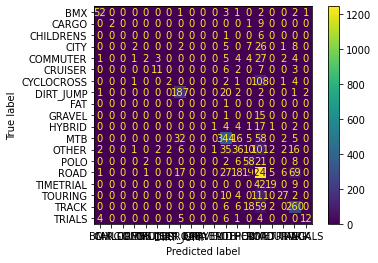

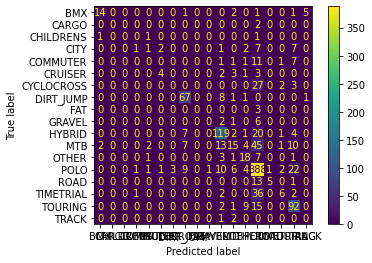

In [26]:
acc_scoreTrain = accuracy_score(y_train,yhatTrain)
acc_scoreTest = accuracy_score(y_test,yhatTest)
print(f'The accuracy for training data is {acc_scoreTrain:0.3f}')
print(f'The accuracy for the test data is {acc_scoreTest:0.3f}')

J_scoreTrain = jaccard_score(y_train,yhatTrain, average = 'micro')
J_scoreTest = jaccard_score(y_test,yhatTest, average = 'micro')
print(f'Jaccard index for training data is {J_scoreTrain:0.3f}')
print(f'Jaccard index for the test data is {J_scoreTest:0.3f}')

F_scoreTrain = f1_score(y_train,yhatTrain, average = 'micro')
F_scoreTest = f1_score(y_test,yhatTest, average = 'micro')
print(f'F-score for training data is {F_scoreTrain:0.3f}')
print(f'F-score for the test data is {F_scoreTest:0.3f}')

CM_scoreTrain = confusion_matrix(y_train,yhatTrain)   
CM_scoreTest = confusion_matrix(y_test,yhatTest)   

dispTrM=ConfusionMatrixDisplay(CM_scoreTrain, display_labels=lr.classes_)
dispTrM.plot()
dispTsM=ConfusionMatrixDisplay(CM_scoreTest, display_labels=lr.classes_) 
dispTsM.plot()

<font color='red'>__Question (4)__</font>: Use the dataset you used for item 3 and follow the same instruction but this time use Support Vector Machine algorithm to develop a multiclass classifier. Provide step-by-step procedure for your model development. Calculate and report the Jaccard Index and F-Score to assess the performance of the model. Provide the confusion matrix and its plot for both training and test data. Finally, compare your results with what you got in question 3.

accuracy for training data is 0.416
accuracy for test data is 0.398
Jaccard index for training data is 0.262
Jaccard index for the test data is 0.248
F-score for training data is 0.416
F-score for the test data is 0.398


<Figure size 1440x1440 with 0 Axes>

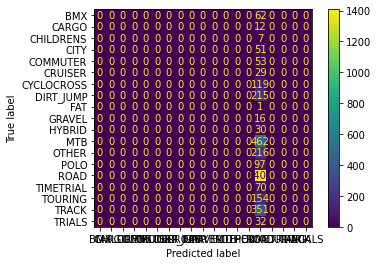

<Figure size 3600x1440 with 0 Axes>

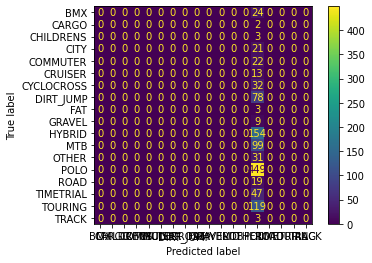

<Figure size 1440x1440 with 0 Axes>

In [28]:
classifier = SVC(kernel = 'rbf', C = 0.1,gamma=30)
classifier.fit(x_train,y_train)
yhatTestSVM=classifier.predict(x_test)
yhatTrainSVM=classifier.predict(x_train)
classifier.classes_
acc_scoreTrainSVM = accuracy_score(y_train,yhatTrainSVM)
acc_scoreTestSVM = accuracy_score(y_test,yhatTestSVM)
print('accuracy for training data is %0.3f' %acc_scoreTrainSVM)
print('accuracy for test data is %0.3f' %acc_scoreTestSVM)

J_scoreTrainSVM = jaccard_score(y_train,yhatTrainSVM, average = 'micro')
J_scoreTestSVM = jaccard_score(y_test,yhatTestSVM, average = 'micro')
print(f'Jaccard index for training data is {J_scoreTrainSVM:0.3f}')
print(f'Jaccard index for the test data is {J_scoreTestSVM:0.3f}')

F_scoreTrainSVM = f1_score(y_train,yhatTrainSVM, average = 'micro')
F_scoreTestSVM = f1_score(y_test,yhatTestSVM, average = 'micro')
print(f'F-score for training data is {F_scoreTrainSVM:0.3f}')
print(f'F-score for the test data is {F_scoreTestSVM:0.3f}')

CM_scoreTrainSVM = confusion_matrix(y_train,yhatTrainSVM)   
CM_scoreTestSVM = confusion_matrix(y_test,yhatTestSVM)   

dispTrM=ConfusionMatrixDisplay(CM_scoreTrainSVM, display_labels=lr.classes_)
dispTrM.plot()
plt.figure(figsize = (50,20))
dispTsM=ConfusionMatrixDisplay(CM_scoreTestSVM, display_labels=lr.classes_) 
dispTsM.plot()
plt.figure(figsize = (20,20))